In [3]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [38]:
train_data =  pd.read_csv("train2.0.csv")
X_test = pd.read_csv("test.csv")
y_test = pd.read_csv("sample_submission.csv")
oil_df = pd.read_csv("oil.csv")
stores_df = pd.read_csv("stores.csv")
holidays_events_df = pd.read_csv("holidays_events.csv")
transactions_df = pd.read_csv("transactions.csv")

In [39]:
#Exploring the dataset:

In [40]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [44]:
X_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [45]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [46]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [51]:
holidays_events_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [52]:
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [53]:
print("train_data",train_data.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
print("oil_df",oil_df.shape)
print("stores_df",stores_df.shape)
print("holidays_events_df",holidays_events_df.shape)
print("transactions_df",transactions_df.shape)

train_data (3000888, 6)
X_test (28512, 5)
y_test (28512, 2)
oil_df (1218, 2)
stores_df (54, 5)
holidays_events_df (350, 6)
transactions_df (83488, 3)


In [54]:
#train_data = pd.merge(train_data,oil_df,how='left',on='date')
train_data = pd.merge(train_data,stores_df,how='left',on='store_nbr')
train_data = pd.merge(train_data,holidays_events_df,how='left',on='date')
train_data = pd.merge(train_data,transactions_df,how='left',on=['date', 'store_nbr'])

#X_test = pd.merge(X_test,oil_df,how='left',on='date')
X_test = pd.merge(X_test,stores_df,how='left',on='store_nbr')
X_test = pd.merge(X_test,holidays_events_df,how='left',on='date')
X_test = pd.merge(X_test,transactions_df,how='left',on=['date', 'store_nbr'])

In [55]:
print('train_data.shape: ',train_data.shape)
print('X_test.shape: ',X_test.shape)

train_data.shape:  (3054348, 16)
X_test.shape:  (28512, 15)


In [56]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,transactions
0,1,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,2,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,3,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,4,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,5,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [57]:
X_test.head()


,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,transactions
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   type_x        object 
 9   cluster       int64  
 10  type_y        object 
 11  locale        object 
 12  locale_name   object 
 13  description   object 
 14  transferred   object 
 15  transactions  float64
dtypes: float64(2), int64(4), object(10)
memory usage: 372.8+ MB


In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            28512 non-null  int64  
 1   date          28512 non-null  object 
 2   store_nbr     28512 non-null  int64  
 3   family        28512 non-null  object 
 4   onpromotion   28512 non-null  int64  
 5   city          28512 non-null  object 
 6   state         28512 non-null  object 
 7   type_x        28512 non-null  object 
 8   cluster       28512 non-null  int64  
 9   type_y        1782 non-null   object 
 10  locale        1782 non-null   object 
 11  locale_name   1782 non-null   object 
 12  description   1782 non-null   object 
 13  transferred   1782 non-null   object 
 14  transactions  0 non-null      float64
dtypes: float64(1), int64(4), object(10)
memory usage: 3.3+ MB


In [60]:
train_data.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
transactions     249117
dtype: int64

In [61]:
X_test.isna().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
city                0
state               0
type_x              0
cluster             0
type_y          26730
locale          26730
locale_name     26730
description     26730
transferred     26730
transactions    28512
dtype: int64

In [62]:
train_data = train_data.drop(['transferred'], axis=1)

X_test = X_test.drop(['transferred'], axis=1)

In [63]:
print('train_data.shape: ',train_data.shape)
print('X_test.shape: ',X_test.shape)

train_data.shape:  (3054348, 15)
X_test.shape:  (28512, 14)


In [64]:
train_data.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transactions     249117
dtype: int64

In [65]:
X_test.isna().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
city                0
state               0
type_x              0
cluster             0
type_y          26730
locale          26730
locale_name     26730
description     26730
transactions    28512
dtype: int64

In [66]:
X_test.head()

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transactions
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN


In [67]:
train_data[['type_y','locale','locale_name','description','transactions']] = train_data[['type_y','locale','locale_name','description','transactions']].fillna(0)
X_test[['type_y','locale','locale_name','description','transactions']] = X_test[['type_y','locale','locale_name','description','transactions']].fillna(0)

In [68]:
X_test.shape

(28512, 14)

In [69]:
train_data.isna().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
type_x          0
cluster         0
type_y          0
locale          0
locale_name     0
description     0
transactions    0
dtype: int64

In [70]:
X_test.isna().sum()

id              0
date            0
store_nbr       0
family          0
onpromotion     0
city            0
state           0
type_x          0
cluster         0
type_y          0
locale          0
locale_name     0
description     0
transactions    0
dtype: int64

In [71]:
train_data['family'].value_counts()

family
AUTOMOTIVE                    92556
HOME APPLIANCES               92556
SCHOOL AND OFFICE SUPPLIES    92556
PRODUCE                       92556
PREPARED FOODS                92556
POULTRY                       92556
PLAYERS AND ELECTRONICS       92556
PET SUPPLIES                  92556
PERSONAL CARE                 92556
MEATS                         92556
MAGAZINES                     92556
LIQUOR,WINE,BEER              92556
LINGERIE                      92556
LAWN AND GARDEN               92556
LADIESWEAR                    92556
HOME CARE                     92556
HOME AND KITCHEN II           92556
BABY CARE                     92556
HOME AND KITCHEN I            92556
HARDWARE                      92556
GROCERY II                    92556
GROCERY I                     92556
FROZEN FOODS                  92556
EGGS                          92556
DELI                          92556
DAIRY                         92556
CLEANING                      92556
CELEBRATION          

In [72]:
def categTheDate(feature, start):
    le = LabelEncoder()
    dic_feature = {}
    feature = feature.astype(str)
    le.fit(feature)
    feature_value = le.classes_
    feature_category = np.arange(start, len(le.classes_)+start)
    for v, c in zip(feature_value, feature_category):
        dic_feature[v] = c
    return feature.map(dic_feature)

In [73]:
X_test.shape

(28512, 14)

In [75]:
train_data['family'] = categTheDate(feature=train_data['family'],start=1)
train_data['city'] = categTheDate(feature=train_data['city'],start=1)
train_data['state'] = categTheDate(feature=train_data['state'],start=1)
train_data['type_x'] = categTheDate(feature=train_data['type_x'],start=1)
train_data['type_y'] = categTheDate(feature=train_data['type_y'],start=1)
train_data['locale'] = categTheDate(feature=train_data['locale'],start=1)
train_data['locale_name'] = categTheDate(feature=train_data['locale_name'],start=1)
train_data['description'] = categTheDate(feature=train_data['state'],start=1)
# train_data['transferred'] = categTheDate(feature=train_data['transferred'],start=0)

X_test['family'] = categTheDate(feature=X_test['family'],start=1)
X_test['city'] = categTheDate(feature=X_test['city'],start=1)
X_test['state'] = categTheDate(feature=X_test['state'],start=1)
X_test['type_x'] = categTheDate(feature=X_test['type_x'],start=1)
X_test['type_y'] = categTheDate(feature=X_test['type_y'],start=1)
X_test['locale'] = categTheDate(feature=X_test['locale'],start=1)
X_test['locale_name'] = categTheDate(feature=X_test['locale_name'],start=1)
X_test['description'] = categTheDate(feature=X_test['state'],start=1)
# X_test['transferred'] = categTheDate(feature=X_test['transferred'],start=0)

In [76]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transactions
0,1,2013-01-01,1,1,0.0,0,11,5,4,13,5,3,22,12,0.0
1,2,2013-01-01,1,12,0.0,0,11,5,4,13,5,3,22,12,0.0
2,3,2013-01-01,1,23,0.0,0,11,5,4,13,5,3,22,12,0.0
3,4,2013-01-01,1,28,0.0,0,11,5,4,13,5,3,22,12,0.0
4,5,2013-01-01,1,29,0.0,0,11,5,4,13,5,3,22,12,0.0


In [77]:
X_test.head()

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transactions
0,3000888,2017-08-16,1,1,0,11,5,4,13,1,1,1,12,0.0
1,3000889,2017-08-16,1,12,0,11,5,4,13,1,1,1,12,0.0
2,3000890,2017-08-16,1,23,2,11,5,4,13,1,1,1,12,0.0
3,3000891,2017-08-16,1,28,20,11,5,4,13,1,1,1,12,0.0
4,3000892,2017-08-16,1,29,0,11,5,4,13,1,1,1,12,0.0


In [78]:
def splitDate(X,ind,split):
    return X.split(split)[ind]

In [79]:
train_data['Year'] = train_data['date'].apply(lambda X: int(splitDate(X, 0, split='-')))
train_data['Month'] = train_data['date'].apply(lambda X: int(splitDate(X, 1, split='-')))
train_data['Day'] = train_data['date'].apply(lambda X: int(splitDate(X, 2, split='-')))
train_data = train_data.drop(["date"],axis=1)

In [80]:
X_test['Year'] = X_test['date'].apply(lambda X: int(splitDate(X, 0, split='-')))
X_test['Month'] = X_test['date'].apply(lambda X: int(splitDate(X, 1, split='-')))
X_test['Day'] = X_test['date'].apply(lambda X: int(splitDate(X, 2, split='-')))
X_test = X_test.drop(["date"],axis=1)

In [81]:
X_test

,id,store_nbr,family,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transactions,Year,Month,Day
0,3000888,1,1,0,11,5,4,13,1,1,1,12,0.0,2017,8,16
1,3000889,1,12,0,11,5,4,13,1,1,1,12,0.0,2017,8,16
2,3000890,1,23,2,11,5,4,13,1,1,1,12,0.0,2017,8,16
3,3000891,1,28,20,11,5,4,13,1,1,1,12,0.0,2017,8,16
4,3000892,1,29,0,11,5,4,13,1,1,1,12,0.0,2017,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,9,22,1,11,5,2,6,1,1,1,12,0.0,2017,8,31
28508,3029396,9,24,0,11,5,2,6,1,1,1,12,0.0,2017,8,31
28509,3029397,9,25,1,11,5,2,6,1,1,1,12,0.0,2017,8,31
28510,3029398,9,26,9,11,5,2,6,1,1,1,12,0.0,2017,8,31


In [82]:
X_train = train_data.drop(['sales'],axis=1)
y_train = train_data['sales']

In [83]:
def Z_score(X):
    X = np.array(X)
    X_new = np.matrix([((x-x.mean())/x.std()) for x in X.T]).T
    return X_new

In [84]:
X_train_nor = Z_score(X_train)
X_train_df = pd.DataFrame(X_train_nor,columns=X_train.columns)

In [85]:
X_train_df

,id,store_nbr,family,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transactions,Year,Month,Day
0,-1.736517,-1.700267,-1.680336,-0.213586,-0.251198,-0.626793,0.83205,0.971780,2.534757,2.629431,2.709925,0.714255,-1.503816,-1.369251,-1.547861,-1.665297
1,-1.736516,-1.700267,-0.525105,-0.213586,-0.251198,-0.626793,0.83205,0.971780,2.534757,2.629431,2.709925,0.714255,-1.503816,-1.369251,-1.547861,-1.665297
2,-1.736515,-1.700267,0.630126,-0.213586,-0.251198,-0.626793,0.83205,0.971780,2.534757,2.629431,2.709925,0.714255,-1.503816,-1.369251,-1.547861,-1.665297
3,-1.736514,-1.700267,1.155231,-0.213586,-0.251198,-0.626793,0.83205,0.971780,2.534757,2.629431,2.709925,0.714255,-1.503816,-1.369251,-1.547861,-1.665297
4,-1.736512,-1.700267,1.260252,-0.213586,-0.251198,-0.626793,0.83205,0.971780,2.534757,2.629431,2.709925,0.714255,-1.503816,-1.369251,-1.547861,-1.665297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,1.727662,-1.186979,0.525105,-0.213586,-0.251198,-0.626793,-0.83205,-0.533682,2.534757,1.108390,1.522905,0.714255,0.575362,1.603385,0.526674,-0.074641
3054344,1.727663,-1.186979,0.735147,-0.131986,-0.251198,-0.626793,-0.83205,-0.533682,2.534757,1.108390,1.522905,0.714255,0.575362,1.603385,0.526674,-0.074641
3054345,1.727665,-1.186979,0.840168,11.863180,-0.251198,-0.626793,-0.83205,-0.533682,2.534757,1.108390,1.522905,0.714255,0.575362,1.603385,0.526674,-0.074641
3054346,1.727666,-1.186979,0.945189,0.439212,-0.251198,-0.626793,-0.83205,-0.533682,2.534757,1.108390,1.522905,0.714255,0.575362,1.603385,0.526674,-0.074641


In [86]:
#Creating the model

In [87]:
import math
from tqdm import tqdm

class metrics:

    def __init__(self):
        pass

    def accuracy_score(self, y_predict, y_test):
        N = len(y_predict)
        y_predict = np.array(y_predict)
        y_test = np.array(y_test)
        counter = [1 for i in range(N) if y_predict[i] == y_test[i]]
        correct = sum(counter)
        accur = correct/N
        return accur

    def comparing(self, value1, value2, name1='Predicted', name2='Actual'):
        data = pd.DataFrame({name1: value1, name2: value2})
        return data
    
    def mean_squared_error(self,y_predict, y_test):
        error = (y_predict - y_test)**2
        return (np.sum(error))/len(y_predict)


class LinearRegression:
    def __init__(self,lr = 0.01, n_iters=1000,lam=1):
        self.lr = lr
        self.n_iters = n_iters
        self.lam = lam
        self.weight = None
        self.bias = None
    
    def fit(self,X_train,y_train):
        self.m_samples, self.n_features = X_train.shape
        self.X_train = X_train
        self.y_train = y_train
        self.weight = np.full(shape=self.n_features,fill_value=0.1)
        self.bias = 0

        cost, w_history = self.gradientDescent()
        
        return self.weight, self.bias, cost, w_history
    
    def relu(self, z):
        return np.maximum(0, z)

    def predict(self,X):
        y_pred = np.dot(X,(self.weight).T) + self.bias
        y_predict = self.relu(y_pred)
        return y_predict

    def gradientDescent(self):
        cost = np.zeros(self.n_iters)
        w_history = np.zeros((self.n_iters, self.n_features))
        with tqdm(total=self.n_iters) as pbar:
            for i in range(self.n_iters):

                y_pred = self.predict(self.X_train)

                error = y_pred - self.y_train
                dw = (1/self.m_samples) * np.dot(error,self.X_train)
                db = (1/self.m_samples) * np.sum(error)

                w_history[i] = self.weight
                self.weight = self.weight - self.lr * dw
                self.bias = self.bias - self.lr * db
                
                cost[i] = metrics().mean_squared_error(y_predict=y_pred,y_test=self.y_train)
                pbar.update(1)
        return cost, w_history

In [88]:
#Using the model

In [89]:
linear = LinearRegression()
weight, bias, cost, w_history = linear.fit(X_train_df,y_train)
y_predict = linear.predict(X_test)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:20<00:00,  7.13it/s]


In [90]:
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [91]:
print('y_predict.shape: ',y_predict.shape)
print('y_test.shape: ',y_test.shape)

y_predict.shape:  (28512,)
y_test.shape:  (28512, 2)


In [92]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_test['sales'], y_predict)

0.0

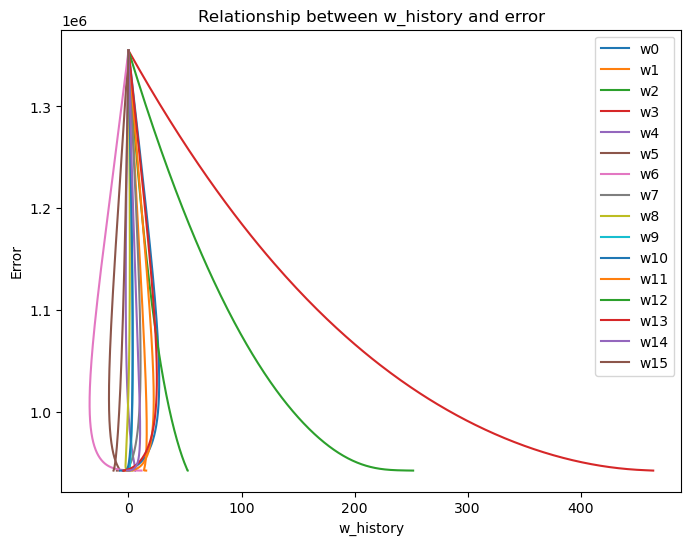

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for w,i in zip(w_history.T,range(len(w_history))):
    plt.plot(w, cost, label = f"w{i}") 

plt.legend()
plt.title('Relationship between w_history and error')
plt.xlabel('w_history')
plt.ylabel('Error')
plt.show()

In [94]:
submission = pd.DataFrame({
    'id': y_test['id'],
    'sales': y_predict
})

submission.to_csv('submission.csv', index=False)